**SGD**

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 45us/step - loss: 1.0235 - acc: 0.6857 - val_loss: 0.6827 - val_acc: 0.7579
Epoch 2/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.5893 - acc: 0.8042 - val_loss: 0.5560 - val_acc: 0.8094
Epoch 3/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.5109 - acc: 0.8249 - val_loss: 0.5296 - val_acc: 0.8143
Epoch 4/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.4762 - acc: 0.8357 - val_loss: 0.5562 - val_acc: 0.7978
Epoch 5/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.4521 - acc: 0.8431 - val_loss: 0.4777 - val_acc: 0.8290
Epoch 6/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.4347 - acc: 0.8473 - val_loss: 0.4688 - val_acc: 0.8305
Epoch 7/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.4209 - acc: 0.8538 - val_loss: 0.4900 - val_acc

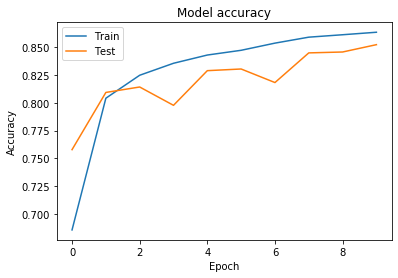

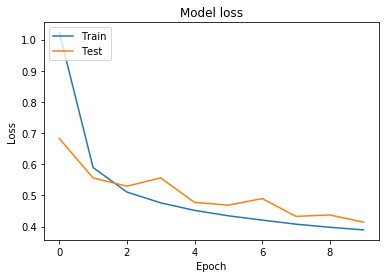

In [17]:
#import packages
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import to_categorical
from keras import optimizers

sgd=keras.optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False)

#import dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Reshape data
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype('float32') / 255

# Categorically encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


model = Sequential()
model.add(Dense(1024, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile model using above optimizer
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history=model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Summary of neural network
model.summary()

import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### SGD:
Test loss: 0.41416938586235047
Test accuracy: 0.8524

**RMSProp**

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.5842 - acc: 0.7877 - val_loss: 0.4617 - val_acc: 0.8266
Epoch 2/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.3973 - acc: 0.8550 - val_loss: 0.4026 - val_acc: 0.8601
Epoch 3/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.3560 - acc: 0.8699 - val_loss: 0.3831 - val_acc: 0.8689
Epoch 4/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.3340 - acc: 0.8789 - val_loss: 0.3583 - val_acc: 0.8765
Epoch 5/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.3198 - acc: 0.8848 - val_loss: 0.4015 - val_acc: 0.8715
Epoch 6/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.3090 - acc: 0.8879 - val_loss: 0.3638 - val_acc: 0.8772
Epoch 7/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.3020 - acc: 0.8912 - val_loss: 0.4087 - val_acc

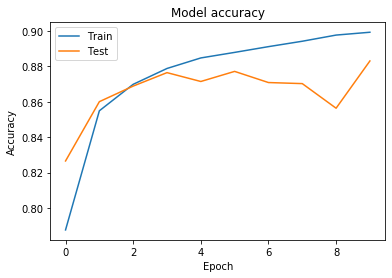

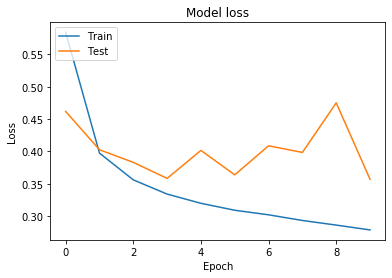

In [18]:
#import packages
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import to_categorical
from keras import optimizers

rms=keras.optimizers.RMSprop(lr=0.001, rho=0.9)

#import dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Reshape data
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype('float32') / 255

# Categorically encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



model = Sequential()
model.add(Dense(1024, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile model using above optimizer
model.compile(optimizer=rms,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history=model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Summary of neural network
model.summary()

import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### RMSProp: 
Test loss: 0.3569283892273903
Test accuracy: 0.8831

**Adagrad**

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 50us/step - loss: 1.2029 - acc: 0.7643 - val_loss: 0.4008 - val_acc: 0.8558
Epoch 2/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.3539 - acc: 0.8706 - val_loss: 0.3704 - val_acc: 0.8655
Epoch 3/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.3110 - acc: 0.8855 - val_loss: 0.3377 - val_acc: 0.8789
Epoch 4/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.2847 - acc: 0.8943 - val_loss: 0.3362 - val_acc: 0.8781
Epoch 5/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.2653 - acc: 0.9013 - val_loss: 0.3338 - val_acc: 0.8801
Epoch 6/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.2499 - acc: 0.9078 - val_loss: 0.3190 - val_acc: 0.8830
Epoch 7/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.2351 - acc: 0.9121 - val_loss: 0.3088 - val_acc

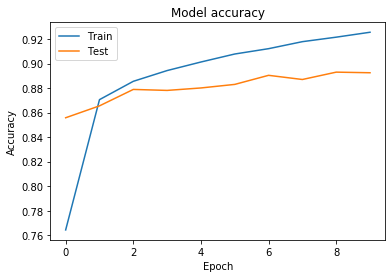

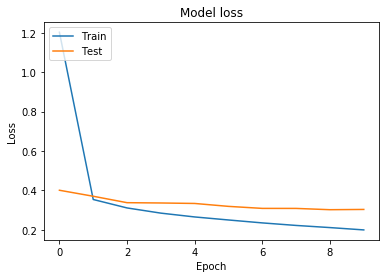

In [19]:
#import packages
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import to_categorical
from keras import optimizers

ada=keras.optimizers.Adagrad(lr=0.01)

#import dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Reshape data
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype('float32') / 255

# Categorically encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


model = Sequential()
model.add(Dense(1024, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile model using above optimizer
model.compile(optimizer=ada,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history=model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Summary of neural network
model.summary()

import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Adagrad:
Test loss: 0.3034706678628922
Test accuracy: 0.8925

**Adadelta**

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.5822 - acc: 0.7842 - val_loss: 0.4241 - val_acc: 0.8419
Epoch 2/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.3921 - acc: 0.8536 - val_loss: 0.4174 - val_acc: 0.8431
Epoch 3/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.3429 - acc: 0.8705 - val_loss: 0.3709 - val_acc: 0.8655
Epoch 4/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.3151 - acc: 0.8826 - val_loss: 0.3700 - val_acc: 0.8642
Epoch 5/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.2912 - acc: 0.8892 - val_loss: 0.3513 - val_acc: 0.8693
Epoch 6/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.2733 - acc: 0.8968 - val_loss: 0.3368 - val_acc: 0.8766
Epoch 7/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.2589 - acc: 0.9010 - val_loss: 0.3495 - val_acc

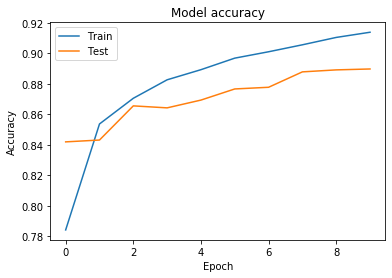

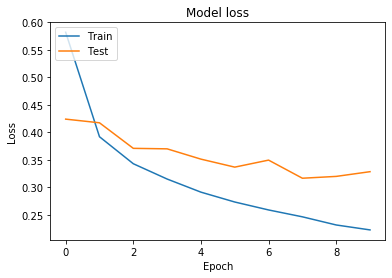

In [20]:
#import packages
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import to_categorical
from keras import optimizers

adelta=keras.optimizers.Adadelta(lr=1.0, rho=0.95)

#import dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Reshape data
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype('float32') / 255

# Categorically encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


model = Sequential()
model.add(Dense(1024, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile model using above optimizer
model.compile(optimizer=adelta,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history=model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Summary of neural network
model.summary()

import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Adadelta:
Test loss: 0.32849582187533377
Test accuracy: 0.8897

**Adam**

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.4745 - acc: 0.8265 - val_loss: 0.4467 - val_acc: 0.8373
Epoch 2/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.3549 - acc: 0.8676 - val_loss: 0.3609 - val_acc: 0.8702
Epoch 3/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.3177 - acc: 0.8828 - val_loss: 0.3518 - val_acc: 0.8745
Epoch 4/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.2916 - acc: 0.8911 - val_loss: 0.3369 - val_acc: 0.8796
Epoch 5/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.2761 - acc: 0.8957 - val_loss: 0.3348 - val_acc: 0.8786
Epoch 6/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.2586 - acc: 0.9020 - val_loss: 0.3418 - val_acc: 0.8775
Epoch 7/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.2488 - acc: 0.9062 - val_loss: 0.3585 - val_acc

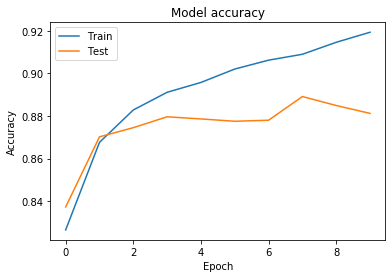

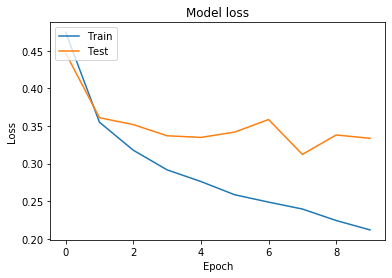

In [21]:
#import packages
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import to_categorical
from keras import optimizers

adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

#import dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Reshape data
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype('float32') / 255

# Categorically encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


model = Sequential()
model.add(Dense(1024, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile model using above optimizer
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history=model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Summary of neural network
model.summary()

import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Adam:
Test loss: 0.3335650362491608
Test accuracy: 0.8812

**Adamax**

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.4868 - acc: 0.8242 - val_loss: 0.3995 - val_acc: 0.8568
Epoch 2/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.3529 - acc: 0.8710 - val_loss: 0.3782 - val_acc: 0.8656
Epoch 3/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.3154 - acc: 0.8833 - val_loss: 0.3709 - val_acc: 0.8658
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.2918 - acc: 0.8905 - val_loss: 0.3549 - val_acc: 0.8691
Epoch 5/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.2704 - acc: 0.8980 - val_loss: 0.3461 - val_acc: 0.8755
Epoch 6/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.2554 - acc: 0.9029 - val_loss: 0.3210 - val_acc: 0.8870
Epoch 7/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.2380 - acc: 0.9093 - val_loss: 0.3138 - val_acc

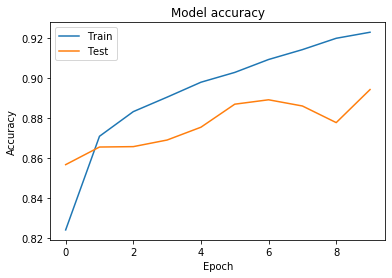

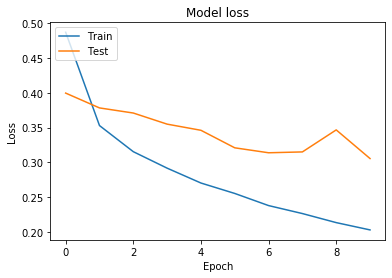

In [25]:
#import packages
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import to_categorical
from keras import optimizers

adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)

#import dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Reshape data
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype('float32') / 255

# Categorically encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


model = Sequential()
model.add(Dense(1024, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile model using above optimizer
model.compile(optimizer=adamax,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history=model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Summary of neural network
model.summary()

import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

###Adamax:
Test loss: 0.30554494045972824,
Test accuracy: 0.8943

**Nadam**

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.5370 - acc: 0.8014 - val_loss: 0.4389 - val_acc: 0.8367
Epoch 2/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3661 - acc: 0.8654 - val_loss: 0.4087 - val_acc: 0.8603
Epoch 3/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.3191 - acc: 0.8821 - val_loss: 0.3458 - val_acc: 0.8731
Epoch 4/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.2964 - acc: 0.8901 - val_loss: 0.3370 - val_acc: 0.8780
Epoch 5/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.2742 - acc: 0.8970 - val_loss: 0.3511 - val_acc: 0.8739
Epoch 6/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.2579 - acc: 0.9036 - val_loss: 0.3661 - val_acc: 0.8679
Epoch 7/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.2464 - acc: 0.9065 - val_loss: 0.3271 - val_acc

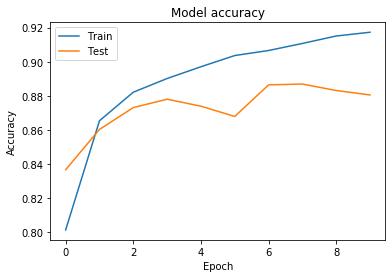

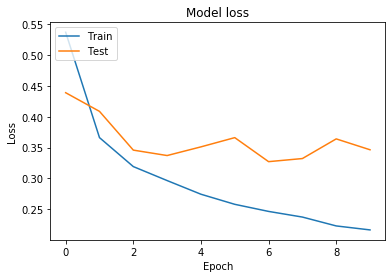

In [26]:
#import packages
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import to_categorical
from keras import optimizers

nadam=keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999)

#import dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Reshape data
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype('float32') / 255

# Categorically encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


model = Sequential()
model.add(Dense(1024, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile model using above optimizer
model.compile(optimizer=nadam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history=model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Summary of neural network
model.summary()

import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

###Nadam:
Test loss: 0.3463677459478378
Test accuracy: 0.8805

##Adamax is the best model with the best accuracy and the least loss.

###Adamax Model Diagram

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.1661 - acc: 0.9355 - val_loss: 0.3339 - val_acc: 0.8954
Epoch 2/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.1510 - acc: 0.9408 - val_loss: 0.3352 - val_acc: 0.9009
Epoch 3/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.1431 - acc: 0.9432 - val_loss: 0.3467 - val_acc: 0.8987
Epoch 4/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.1344 - acc: 0.9464 - val_loss: 0.3682 - val_acc: 0.8984
Epoch 5/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.1274 - acc: 0.9497 - val_loss: 0.3786 - val_acc: 0.8977
Epoch 6/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.1218 - acc: 0.9517 - val_loss: 0.3828 - val_acc: 0.9013
Epoch 7/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.1158 - acc: 0.9538 - val_loss: 0.3995 - val_acc

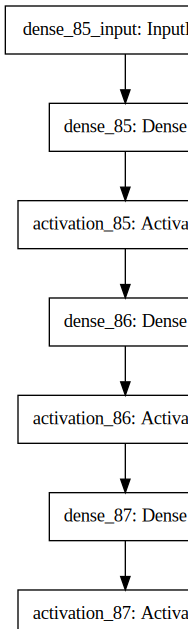

In [27]:
# Output network visualization
model.compile(optimizer=adamax,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history=model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))